***Defence Structure Analysis*** <br>
Authors: Aurelien Giuglaris Michael, Laurent Bijman, Antoine Dorard

## Load All Defence Structure Data <br>
Concatenate all defence data together and load it in a dataframe to get a similar structure as our dataframe in troop analysis.


In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"Defence": ["Air Defense", "Archer Tower", "Bomb Tower", "Canon", "Hidden Tesla", "Mortar", "Wizard Tower", "X-Bow"]})

for row in df.iterrows():
    file_name = row[1].iloc[0].replace(" ", "_") + "_data.csv"
    current_df = pd.read_csv(file_name)
    
    print(current_df["Damage per Second"].to_list())
    
    #for current_row in current_df.iterrows(): 
        

[80, 110, 140, 160, 190, 230, 280, 320, 360, 400, 440, 500, 540, 600]
[11, 15, 19, 25, 30, 35, 42, 48, 56, 63, 70, 75, 80, 90, 100, 105, 110, 120, 130, 138, 145]
[24, 28, 32, 40, 48, 56, 64, 72, 84, 94, 104]
[9, 11, 15, 19, 25, 31, 40, 48, 56, 64, 74, 85, 95, 105, 115, 120, 125, 130, 140, 150, 160]
[34, 40, 48, 55, 64, 75, 87, 99, 110, 120, 130, 140, 150, 160]
[4, 5, 6, 7, 9, 11, 15, 20, 25, 30, 35, 38, 42, 48, 54, 60]
[11, 13, 16, 20, 24, 32, 40, 45, 50, 62, 70, 78, 84, 90, 95, 102]
[60, 70, 80, 90, 110, 130, 150, 170, 190, 205, 225]


In [3]:
import pandas as pd
import os

def get_troop_data(path):
    df = pd.read_json(path)
    return df.drop(df.columns[0], axis=1)

df = pd.DataFrame({"Defence": ["Air Defense", "Archer Tower", "Bomb Tower", "Canon", "Hidden Tesla", "Mortar", "Wizard Tower", "X-Bow", "Archer Queen","Barbarian King"]})

# Create an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

for row in df.iterrows():
    file_name = row[1].iloc[0].replace(" ", "_") + "_data.csv"
    if os.path.exists(file_name):  # Check if the file exists
        df_temp = pd.read_csv(file_name)
        df_temp.insert(0, 'Defence', row[1].iloc[0])  # Add a new column with the Defence type
        # Grouping multiple values with the same Defence name into a list
        df_grouped = df_temp.groupby('Defence').agg(lambda x: x.tolist()).reset_index()
        concatenated_df = pd.concat([concatenated_df, df_grouped], ignore_index=True)

# Now, you have all the data concatenated in the 'concatenated_df' DataFrame with multiple values grouped into a list
concatenated_df

,Defence,Level,Damage per Second,Damage per Shot,Hitpoints,Build cost,Build time,Experience Gained,Town Hall Level Required
0,Air Defense,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[80, 110, 140, 160, 190, 230, 280, 320, 360, 4...","[80, 110, 140, 160, 190, 230, 280, 320, 360, 4...","[800, 850, 900, 950, 1,000, 1,050, 1,100, 1,21...","[22,000, 90,000, 270,000, 500,000, 800,000, 1,...","[3h, 8h, 12h, 18h, 1d, 1d 12h, 2d, 2d 12h, 3d,...","[103, 169, 207, 254, 293, 360, 415, 464, 509, ...","[4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]"
1,Archer Tower,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[11, 15, 19, 25, 30, 35, 42, 48, 56, 63, 70, 7...","[5.5, 7.5, 9.5, 12.5, 15.0, 17.5, 21.0, 24.0, ...","[380, 420, 460, 500, 540, 580, 630, 690, 750, ...","[1,000, 2,000, 5,000, 20,000, 80,000, 150,000,...","[1m, 15m, 45m, 3h, 4h, 5h, 8h, 10h, 12h, 12h, ...","[7, 30, 51, 103, 120, 134, 169, 189, 207, 207,...","[2, 2, 3, 4, 5, 5, 6, 7, 8, 8, 9, 10, 10, 11, ..."
2,Bomb Tower,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[24, 28, 32, 40, 48, 56, 64, 72, 84, 94, 104]","[26.4, 30.8, 35.2, 44.0, 52.8, 61.6, 70.4, 79....","[650, 700, 750, 850, 1,050, 1,300, 1,600, 1,90...","[700,000, 1,000,000, 1,600,000, 2,000,000, 2,8...","[18h, 1d, 1d 12h, 2d, 3d, 3d, 8d, 9d, 13d, 13d...","[254, 293, 360, 415, 509, 509, 831, 881, 1,059...","[8, 8, 9, 10, 11, 11, 12, 13, 14, 15, 16]"
3,Canon,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[9, 11, 15, 19, 25, 31, 40, 48, 56, 64, 74, 85...","[7.2, 8.8, 12.0, 15.2, 20.0, 24.8, 32.0, 38.4,...","[420, 470, 520, 570, 620, 670, 730, 800, 880, ...","[250, 1,000, 4,000, 16,000, 50,000, 100,000, 1...","[10s, 2m, 10m, 45m, 1h, 2h, 4h, 8h, 10h, 10h, ...","[3, 10, 24, 51, 60, 84, 120, 169, 189, 189, 20...","[1, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 10, 11, ..."
4,Hidden Tesla,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]","[34, 40, 48, 55, 64, 75, 87, 99, 110, 120, 130...","[20.4, 24.0, 28.8, 33.0, 38.4, 45.0, 52.2, 59....","[600, 630, 660, 690, 730, 770, 810, 850, 900, ...","[250,000, 350,000, 520,000, 800,000, 1,000,000...","[2h, 3h, 5h, 12h, 18h, 1d, 2d, 2d 12h, 3d, 7d ...","[84, 103, 134, 207, 254, 293, 415, 464, 509, 8...","[7, 7, 7, 8, 8, 8, 9, 10, 11, 12, 13, 13, 14, 15]"
5,Mortar,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[4, 5, 6, 7, 9, 11, 15, 20, 25, 30, 35, 38, 42...","[20, 25, 30, 35, 45, 55, 75, 100, 125, 150, 17...","[400, 450, 500, 550, 600, 650, 700, 800, 950, ...","[5,000, 25,000, 100,000, 200,000, 300,000, 560...","[3h, 6h, 12h, 18h, 1d, 2d, 2d 12h, 2d 12h, 3d,...","[103, 146, 207, 254, 293, 415, 464, 464, 509, ...","[3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 12, 13, ..."
6,Wizard Tower,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[11, 13, 16, 20, 24, 32, 40, 45, 50, 62, 70, 7...","[14.3, 16.9, 20.8, 26.0, 31.2, 41.6, 52.0, 58....","[620, 650, 680, 730, 840, 960, 1,200, 1,440, 1...","[120,000, 220,000, 400,000, 540,000, 700,000, ...","[3h, 3h, 8h, 12h, 18h, 1d, 1d 12h, 2d, 2d 12h,...","[103, 103, 169, 207, 254, 293, 360, 415, 464, ...","[5, 5, 6, 7, 8, 8, 9, 10, 10, 11, 12, 13, 13, ..."
7,X-Bow,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[60, 70, 80, 90, 110, 130, 150, 170, 190, 205,...","[7.68, 8.96, 10.24, 11.52, 14.08, 16.64, 19.2,...","[1,500, 1,900, 2,300, 2,700, 3,100, 3,400, 3,7...","[1,000,000, 1,600,000, 2,400,000, 2,500,000, 3...","[2d, 2d 12h, 3d 12h, 5d, 5d 6h, 8d 12h, 9d, 9d...","[415, 464, 549, 657, 673, 856, 881, 881, 1,059...","[9, 9, 9, 10, 11, 12, 13, 13, 14, 15, 16]"
8,Archer Queen,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[136, 139, 143, 146, 150, 154, 157, 162, 165, ...","[102.0, 104.25, 107.25, 109.5, 112.5, 115.5, 1...","[580, 592, 604, 617, 630, 643, 657, 670, 685, ...","[10,000, 10,000, 11,000, 12,000, 13,000, 14,00...","[nan, 4h, 6h, 8h, 10h, 12h, 14h, 16h, 18h, 20h...",NaN,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ..."
9,Barbarian King,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[102, 104, 105, 108, 110, 112, 115, 116, 119, ..."

## Research Question 2 <br>
Jerry wants to know which defence structure is the best overall. For this research question, just like others, we assume Jerry has townhall maxed out at level 9. 
<br>
<br>
In order to achieve this, first compute ranks for each defence in three categories: ground DPS (Damage Per Second), aerial DPS, Hitpoints (HP); then sum the ranks of each defence, the defence with the highest rank becomes the best of all defences.

In [4]:
# Ground DPS
ground_defences = concatenated_df.copy()
ground_defences.drop(ground_defences.index[0], inplace=True) # Air Defense
ground_defences.reset_index(drop=True, inplace=True)
ground_defences

element_to_find = 9

dps_ground = []
for row in ground_defences.iterrows():
        th_index = row[1].loc["Town Hall Level Required"] 
        index_in_reversed = th_index[::-1].index(element_to_find)  
        last_occurrence_index = len(th_index) - 1 - index_in_reversed
        
        lvl = row[1].loc["Level"]
        
        dps_index = lvl[last_occurrence_index]
        
        dps_list = row[1].loc["Damage per Second"]
        
        dps_ground.append(dps_list[dps_index])
        
# Preparing Ground DPS data
dps_ground.insert(0, 0) # Inserting 0 at the beginning because Air defense deals 0 damage


In [5]:
# Aerial DPS
aerial_defences = concatenated_df.copy()
aerial_defences = aerial_defences[aerial_defences["Defence"] != "Canon"]
aerial_defences = aerial_defences[aerial_defences["Defence"] != "Mortar"]
aerial_defences = aerial_defences[aerial_defences["Defence"] != "Bomb Tower"]
aerial_defences = aerial_defences[aerial_defences["Defence"] != "Barbarian King"]

element_to_find = 9

dps_aerial = []
for row in aerial_defences.iterrows():
        th_index = row[1].loc["Town Hall Level Required"] 
        index_in_reversed = th_index[::-1].index(element_to_find)  
        last_occurrence_index = len(th_index) - 1 - index_in_reversed
        
        lvl = row[1].loc["Level"]
        
        dps_index = lvl[last_occurrence_index]
        
        dps_list = row[1].loc["Damage per Second"]
        
        dps_aerial.append(dps_list[dps_index])

# Preparing Aerial DPS data
dps_aerial.insert(2, 0) # Inserting 0 at index 2 for bomb tower
dps_aerial.insert(3, 0) # Inserting 0 at index 3 for canon
dps_aerial.insert(5, 0) # Inserting 0 at index 5 for mortar
dps_aerial.append(0) # Inserting 0 at the end for Barbarian King


In [6]:
# Hitpoints HP
element_to_find = 9

hp_defences = []
for row in concatenated_df.iterrows():
    th_index = row[1].loc["Town Hall Level Required"] 
    index_in_reversed = th_index[::-1].index(element_to_find)  
    last_occurrence_index = len(th_index) - 1 - index_in_reversed
    
    lvl = row[1].loc["Level"]
    
    hp_index = lvl[last_occurrence_index]
    
    hp_list = row[1].loc["Hitpoints"]
    
    element = hp_list[hp_index].replace(",", "")
    
    hp_defences.append(int(element))



In [7]:
# Plotting the ranks / Uncomment the code to see the intermediary graphs

# Retrieving names of the defences:
defences = concatenated_df["Defence"].tolist()

# Ground DPS Data
graph1 = pd.DataFrame({"Defence": defences, "DPS": dps_ground})
# plt.bar(graph1["Defence"], graph1["DPS"])
# plt.xticks(rotation=90)
# plt.xlabel('Defence name')
# plt.ylabel('DPS of Ground Defences')
# plt.title("Damage per Second of Ground Defences")
# plt.show()
    
# HP Data
graph2 = pd.DataFrame({"Defence": defences, "HP": hp_defences})
# plt.bar(graph2["Defence"], graph2["HP"])
# plt.xticks(rotation=90)
# plt.xlabel('Defence name')
# plt.ylabel('HP of Defences')
# plt.title("Hitpoints of Defences")
# plt.show()

# Aerial DPS Data
graph3 = pd.DataFrame({"Defence": defences, "DPS": dps_aerial})
# plt.bar(graph3["Defence"], graph3["DPS"])
# plt.xticks(rotation=90)
# plt.xlabel('Defence name')
# plt.ylabel('DPS of Aerial Defences')
# plt.title("Damage per Second of Aerial Defences")   
# plt.show()


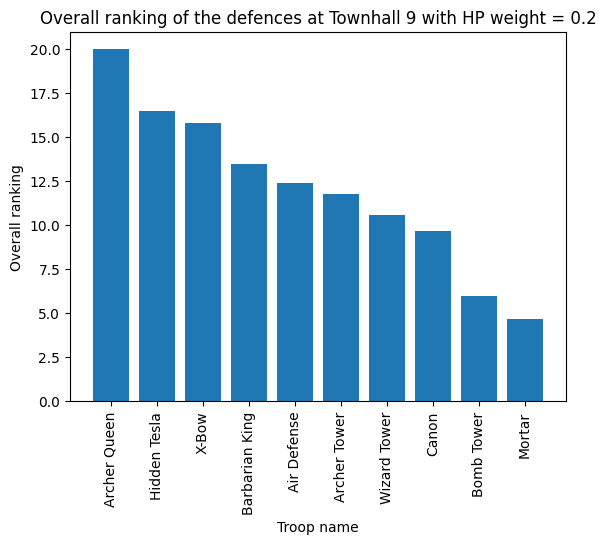

In [10]:
# Answering the question
graph1 = graph1.sort_values(by="DPS", ascending=True)
graph2 = graph2.sort_values(by="HP", ascending=True)
graph3 = graph3.sort_values(by="DPS", ascending=True)

hp_weight = 0.2 # Weight of HP in the overall ranking

overall_ranking = pd.DataFrame({"name": defences, "ground_dps_rank": graph1['DPS'].rank(), "aerial_dps_rank": graph3['DPS'].rank(), "hp_rank": graph2['HP'].rank() * hp_weight, "overall_rank": graph1['DPS'].rank() + graph3['DPS'].rank() + graph2['HP'].rank() * hp_weight})
overall_ranking = overall_ranking.sort_values(by='overall_rank', ascending=True).reset_index()
overall_ranking.drop('index', axis=1, inplace=True) # Drop the index column
overall_ranking_reversed = overall_ranking[::-1]

# Plot the overall ranking
# Make sure HP weight is either 1, 0.2 or 0 to see differences
plt.bar(overall_ranking_reversed['name'], overall_ranking_reversed['overall_rank'])
plt.xticks(rotation=90)
plt.xlabel('Troop name')
plt.ylabel('Overall ranking')
plt.title('Overall ranking of the defences at Townhall 9 with HP weight = 0.2')
plt.show()